<a href="https://colab.research.google.com/github/DavorJordacevic/NEURAL-NETWORKS-/blob/master/Shallow_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow neural network with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# 1. Load the digit dataset

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### 1.1 Spliting data into train and test sets

In [3]:
print(X_digits.shape)
print(y_digits.shape)
print(type(X_digits))
print(type(y_digits))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.2 Checking the shape of the input data

In [4]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1203, 64)
y_train:	(1203,)
x_test:		(594, 64)
y_test:		(594,)


### 1.3 Plot first 64 digits

Now we can plot some digits to see how they look.

*digits.target* contain real value for each image in *digits.images*

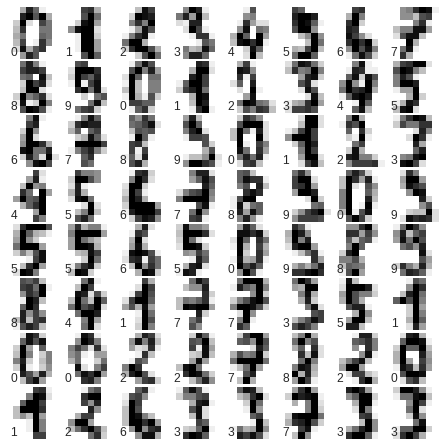

In [5]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### 1.4 One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Create the network

### 2.1 Hyper-parameters

In [0]:
# Hyper-parameters
training_epochs = 100 # Total number of training epochs
learning_rate = 0.01 # The learning rate

### 2.2 Creating a model

Our model will have 2 layers, with 64(*height x width*) neurons in the input layer and 10 neurons in the output layer.
We will use normal initializer that generates tensors with a normal distribution.

The optimizer we'll use is **Adam** .It is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data. Adam is a popular algorithm in the field of deep learning because it achieves good results fast. Default parameters follow those provided in the original paper. 

To make this work in keras we need to compile the model. An important choice to make is the loss function. We use the **categorical_crossentropy** loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

In [8]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(64, input_dim=64, kernel_initializer='normal',
            kernel_regularizer= keras.regularizers.l2(0.01),activation='tanh'))
  # Output layer
  model.add(Dense(10, activation='softmax'))
 
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


### 2.3 Train the mode

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test),
 verbose = 0
)

### 2.4 Test the model

Model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.5 Mean error value

Test-Accuracy :

In [11]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_acc"])*100))

Test-Accuracy: 96.53%


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [12]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
1203/1203 [==============================] - 0s 28us/step
loss=0.0286, accuracy: 100.0000%
Evaluating on testing set...
594/594 [==============================] - 0s 27us/step
loss=0.0941, accuracy: 97.8114%


### 2.7 Summarize history for accuracy

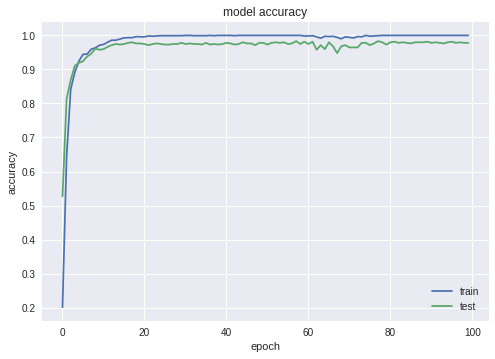

In [13]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 2.5770

Minimum Loss : 0.0282

Loss difference : 2.5488


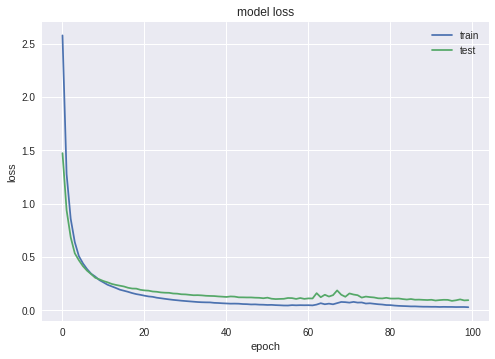

In [14]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.3 Display the test set and predictions

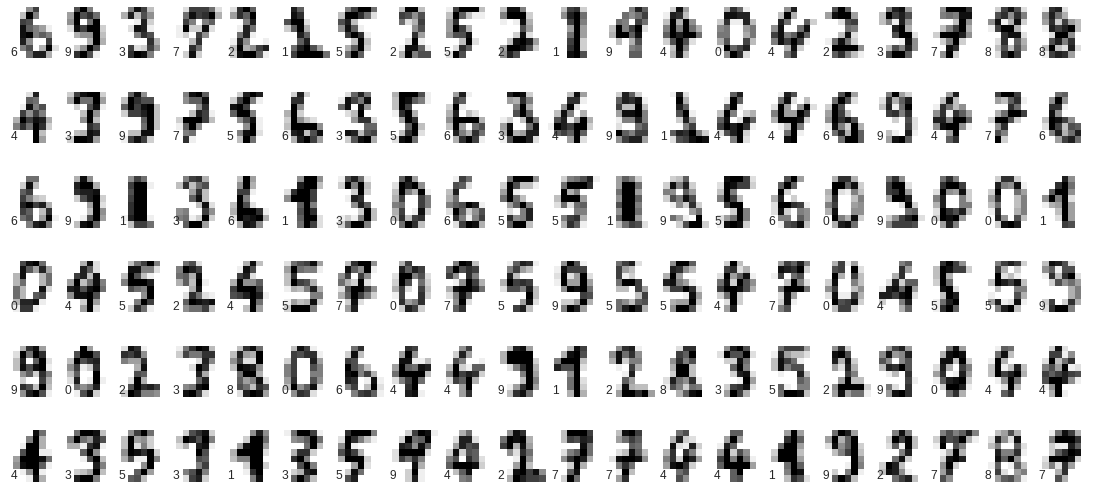

In [15]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))

### 3.2 Display the weights and biases of our model

In [16]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)


# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (64, 64) :
 [[-1.9338269e-09  9.9761692e-09  6.1644263e-09 ...  7.3207476e-09
   6.7223103e-09 -5.9653376e-09]
 [-4.0999567e-03  6.5478841e-03  1.6160484e-02 ... -1.5781240e-03
  -2.9144357e-03 -1.2368693e-03]
 [-4.2532748e-03  1.2523134e-02 -1.8816341e-02 ... -5.9774211e-03
  -4.0428150e-03 -5.1849809e-02]
 ...
 [-1.8526470e-02 -7.6773628e-03  2.7927471e-02 ...  2.1515884e-03
  -1.8018320e-02  2.7550181e-02]
 [ 1.1284457e-02 -2.1114253e-02  2.7366996e-02 ...  7.8304233e-03
  -3.9567305e-03  6.9314218e-03]
 [ 2.0642852e-02 -2.6657158e-03 -4.1126586e-03 ...  3.9743665e-03
   4.1263946e-04  1.9972617e-02]]
Input layer biases (64,) :
 [-0.10964768  0.08202061 -0.02784058  0.14515239 -0.06606875 -0.02981577
  0.01321794  0.05527663 -0.02166332  0.08870235 -0.02740195 -0.0833742
 -0.03388772 -0.02640772  0.01759721  0.04973908 -0.12234868  0.02431352
 -0.00447538 -0.15337977  0.01789165  0.00398867 -0.07671404 -0.06023181
  0.03744029 -0.00866342 -0.07070249 -0.08092108 